In [1]:
import numpy as np
from scipy.stats import chi2
from matplotlib import pyplot as plt
from math import sqrt
%matplotlib inline

## Problem 5.1

Let $X = Z^2$, where $Z \sim N(0, 1)$ is a standard normal.  The random variable $X$ has a ${chi-squared}$ distribution with 1 degree of freedom.  For each of the following problems calculate the answer in the following two ways:

(A). using Monte Carlo methods, sampling with $numpy.random.randn$, and taking the number of samples equal to $10^k$ for each value of $k$ = 2, 4, 6.

(B). using the appropriate built-in function from $scipy.stats.chi2$ and compare the results of the previous conputations.

In [31]:
mean, var, skew, kurt = chi2.stats(1, moments='mvsk')

(i) Plot the p.d.f. of your random variable $X$ (experiment to find a good number of bins for your histogram)

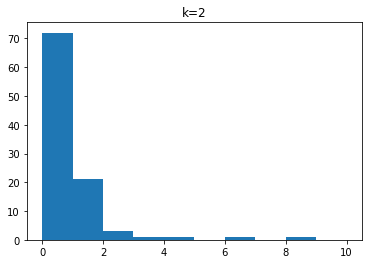

In [45]:
vals_2 = np.random.randn(10**2)**2
plt.hist(vals_2,bins=np.linspace(0,10,11))
plt.title("k=2")
plt.show()

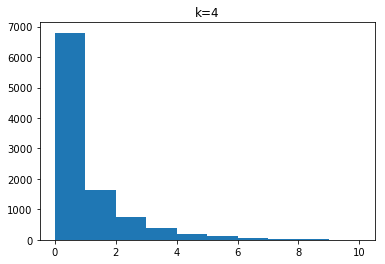

In [46]:
vals_4 = np.random.randn(10**4)**2
plt.hist(vals_4,bins=np.linspace(0,10,11))
plt.title("k=4")
plt.show()

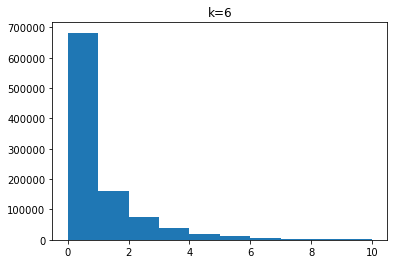

In [47]:
vals_6 = np.random.randn(10**6)**2
plt.hist(vals_6,bins=np.linspace(0,10,11))
plt.title("k=6")
plt.show()

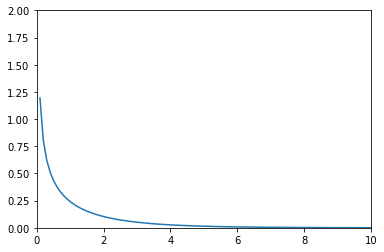

In [2]:
x = np.linspace(0,10,100)
y = chi2.pdf(x, 1)
plt.plot(x,y)
plt.axis([0,10,0,2])
plt.show()

(ii) Compute the c.d.f. $F_{x}(x)$ for $x$ = 0.5, 1.0, 1.5.

In [53]:
print("               k=2    k=4    k=6   ")
for x in [0.5,1.0,1.5] :
    probs = [np.count_nonzero(np.random.randn(10**k)**2 < x)/10**k for k in [2,4,6]]
    print("P(x < {}) : ".format(x) + str(probs))

               k=2    k=4    k=6   
P(x < 0.5) : [0.56, 0.5134, 0.521139]
P(x < 1.0) : [0.74, 0.6855, 0.681661]
P(x < 1.5) : [0.77, 0.7764, 0.779332]


In [55]:
print("Actual values for 0.5, 1.0, and 1.5 respectively:")
chi2.cdf([0.5,1.0,1.5],1)

Actual values for 0.5, 1.0, and 1.5 respectively:


array([ 0.52049988,  0.68268949,  0.77932864])

(iii) Compute the expected value $E[X]$

In [33]:
mus = [sum(np.random.randn(10**k)**2)/10**k for k in [2,4,6]]
print(mus)
print(mean) # From above

[0.98584034508966201, 1.0010573473666351, 1.0001504771093193]
1.0


(iv) Compute the variance Var($X$)

In [34]:
varians = [sum(((np.random.randn(10**k)-mean)**2))/10**k for k in [2,4,6]]
print(varians)
print(var) # From above

[1.9242765235918444, 1.9738987662604057, 2.0037219418006771]
2.0


## Problem 5.2

Write python code to approximate $\pi$ using the Monte Carlo methods in the reading, by sampling pairs from the uniform distribution on [-1, 1] $\times$ [-1, 1] and counting the proportion that lie inside the circle $x^2 + y^2 \leq 1$.  Sample $10^k$ times for $k$ = 2, 4, 6 and compare the results to the true value of $\pi$.  Calculate the (approximate) standard error for each of these estimates.

In [59]:
apps = []
var = []
for k in [2,4,6] :
    x = np.random.uniform(-1,1, (10**k,2))
    in_vs_out = [x[i,0]**2+x[i,1]**2 <= 1 for i in range(10**k)]
    sigma_sqrd = np.var(in_vs_out)
    apps.append(4*np.count_nonzero(in_vs_out)/10**k)
    var.append(sqrt(4**2*sigma_sqrd/10**k))
print("Approximations : " + str(apps))
print("Variances      : " + str(var))

Approximations : [2.84, 3.0988, 3.142052]
Variances      : [0.18150482087261482, 0.016711189544733194, 0.0016418639496913257]


## Problem 5.3

There are at least two different Monte Carlo methods you could use to approximate of the area under the curve $y = e^{cos(x^2)}$ for $x \in$ [0, 2]

(i) Estimate the area under the curve using the method discussed in class: find

$$\int_0^2 h(x) dx = 2 \int_0^2 h(x) f_{Unif([0, 2])}(x) dx = 2\mathbb{E}[h \circ X]$$

by approsimating $\mathbb{E}[h \circ X]$ at least $10^5$ times.  What is the (approximate value of the) standard error?

In [64]:
2*sum(np.exp(np.cos(np.random.uniform(0,2,10**6)**2)))/10**6

3.2229179611165018

From 5.2, $\sigma^{2} = \frac{1}{3}$ for the normal distribution, so for this distribution we have $\sigma^{2} = e^{\cos\left(\frac{1}{3}\right)} \approx 2.5727$, and so the approximate value of the standard error for $n= 10^{6}$ is approx $0.0025727$.

(ii) Estimate the are under the curve by taking a 2d-sample $Z \sim$ Unif([0, 2]) $\times$ Unif([0, $b$]) for some $b$ with $b \geq max_{x \in [0, 2]} e^{cos(x^2)}$. and the ncount (and scale appropriately) the samples that lie under the curve.  This corresponds to a estimating a multiple of $\mathbb{E}[h \circ X]$, where $k = \mathbb{1}_A$ and $A = \{(x, y) | 0 \leq y \leq e^{cos(e^x)}\}$.  Sample at least $5 \times 10^5$ times.  What is the (approxiamte value of the) standard error?

In [63]:
times = 5*10**6
X = np.hstack((np.random.uniform(0,2,(times,1)),np.random.uniform(0,3,(times,1))))
good_vs_bad = [np.exp(np.cos(X[i,0]**2)) >= X[i,1] for i in range(times)]
sigma_sqrd = np.var(good_vs_bad)
var = sqrt(sigma_sqrd/times)
apps = 6*np.count_nonzero(good_vs_bad)/(times)
print("Approximation : {}".format(apps))
print("Variance      : {}".format(var))

Approximation : 3.2254368
Variance      : 0.00022297456567965768


Compare the results of the two methods.

On average, the second method seems more correct by one decimal point, namely the thousandth decimal point.

## Problem 5.4

Use Monte Carlo methods to estimate the probability that a sample from Beta(2, 5) will be less than a sample from Beta(20, 55).  How many samples are required to give 95% confidence that your answer is correct to 3 decimal places?

In [66]:
trials = 10**6
nums = [np.random.beta(2,5) < np.random.beta(20,55) for i in range(trials)]
prob = sum(nums) / trials
sigma_sqrd = np.var(nums)
var = sqrt(sigma_sqrd/trials)
print("Probability : {}".format(prob))
print("Variance    : {}".format(var))

Probability : 0.500419
Variance    : 0.0004999998244389691


By trial and error, it seems that $10^{6}$ is the magic number for $3$ decimals of accuracy.

## Problem 5.5

Consider a game where you roll a fair four-sided dice with sides labeled 1, 2, 3, and 4.  You win one dollar if the die shows 1 or 2, you win two dollars if the die shows 3, and you lose one dollar if the die shows 4.  Use monte Carlo simulation methods to estimate the probability that your winnings will be negative after ten rolls of the die.  Justify your choice of the number of samples to use.

In [70]:
times = 10**6
negs = []
X = np.random.randint(1,5,size=(times,10))
for k in range(times) :
    Y = X[k,:]
    one = np.count_nonzero([Y[i] == 1 for i in range(len(Y))]) + np.count_nonzero([Y[i] == 2 for i in range(len(Y))])
    two = np.count_nonzero([Y[i] == 3 for i in range(len(Y))])
    neg_one = np.count_nonzero([Y[i] == 4 for i in range(len(Y))])
    if one + 2*two - neg_one < 0 :
        negs.append(1)
    else :
        negs.append(0)
prob = sum(negs) / times
sigma_sqrd = np.var(negs)
var = sqrt(sigma_sqrd/times)
print("Probability : {}".format(prob))
print("Variance    : {}".format(var))

Probability : 0.013016
Variance    : 0.00011334277102665168


Well, $10^{6}$ seems to have been a really good number recently.  While it took a bit longer than I expected, it got me well within three decimal points of accuracy, so I can safely assume the probability is about than $1.3 \%$.